In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
import seaborn as sns

In [92]:
import sqlite3

In [93]:
con = sqlite3.connect(r"C:\Users\shubh\Downloads\database (1).sqlite")

In [94]:
type(con)

sqlite3.Connection

In [95]:
df=pd.read_sql_query("SELECT * FROM REVIEWS" , con)

In [96]:
df.shape

(568454, 10)

In [97]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [98]:
df_valid =df[df['HelpfulnessNumerator'] >= df['HelpfulnessDenominator']]

In [99]:
df_valid.shape

(453363, 10)

In [100]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [101]:
df_valid.duplicated(['UserId','ProfileName','Text','Time'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 453363, dtype: bool

In [102]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Text','Time'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568408,568409,B0018CLWM4,AJGOF4W50ZNB4,je2u,3,3,5,1310515200,Premium Edge Kitten Food,This is a good food with decent ingredients & ...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...


In [103]:
data = df_valid.drop_duplicates(subset=['UserId','ProfileName','Text','Time'])

In [104]:
data.shape

(316203, 10)

In [105]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [106]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 316203, dtype: int64

In [107]:
pd.to_datetime(data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 316203, dtype: datetime64[ns]

In [108]:
data['Time']= pd.to_datetime(data['Time'], unit='s')

In [109]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [110]:
data.shape

(316203, 10)

In [111]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [112]:
data['ProfileName']

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 316203, dtype: object

In [113]:
data['ProfileName'].unique()

array(['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', ...,
       'Lettie D. Carter', 'pksd "pk_007"', 'srfell17'], dtype=object)

In [114]:
data['ProfileName'].nunique()

183636

In [115]:
data['UserId'].nunique()

213876

In [116]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [117]:
data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'})

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
#oc-R11D9D7SHXIJB9,1,1,5.000000,1
#oc-R11O5J5ZVQE25C,1,1,5.000000,1
#oc-R11PW3CFBB4BEP,1,1,3.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [118]:
recommend_df=data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId' ,ascending=False)

In [119]:
recommend_df.columns =['Number_of_summaries','num_text','total_score','no_of_purchase']


In [120]:
recommend_df

,Number_of_summaries,num_text,total_score,no_of_purchase
UserId,,,,
AY12DBB0U420B,302,302,4.655629,302
A3OXHLG6DIBRW8,263,263,4.551331,263
A281NPSIMI1C2R,189,189,4.783069,189
A1Z54EM24Y40LL,183,183,4.486339,183
A1YUL9PCJR3JTY,180,180,4.605556,180
...,...,...,...,...
A2E1NT6D5NBUJY,1,1,5.000000,1
A2E1O1W06SLQJR,1,1,5.000000,1
A2E1OB15RYZIKO,1,1,5.000000,1


In [121]:
recommend_df.index

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1Z54EM24Y40LL',
       'A1YUL9PCJR3JTY', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'A2GEZJHBV92EVR',
       'AZV26LP92E6WU', 'AKMEY1BSHSDG7',
       ...
       'A2E1F2LDIKDVHK', 'A2E1G7W581336M', 'A2E1HHPMOUA9HX', 'A2E1I7BK2U90TL',
       'A2E1IB0RZP8TQC', 'A2E1NT6D5NBUJY', 'A2E1O1W06SLQJR', 'A2E1OB15RYZIKO',
       'A2E1P6KT07A0H5', 'AZZZOVIBXHGDR'],
      dtype='object', name='UserId', length=213876)

In [122]:
recommend_df['no_of_purchase'][0:10]

UserId
AY12DBB0U420B     302
A3OXHLG6DIBRW8    263
A281NPSIMI1C2R    189
A1Z54EM24Y40LL    183
A1YUL9PCJR3JTY    180
A2MUGFV2TDQ47K    130
A3D6OI36USYOU1    123
A2GEZJHBV92EVR    113
AZV26LP92E6WU     108
AKMEY1BSHSDG7     101
Name: no_of_purchase, dtype: int64

In [123]:
recommend_df['no_of_purchase'][0:10].values

array([302, 263, 189, 183, 180, 130, 123, 113, 108, 101], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1Z54EM24Y40LL'),
  Text(4, 0, 'A1YUL9PCJR3JTY'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'A2GEZJHBV92EVR'),
  Text(8, 0, 'AZV26LP92E6WU'),
  Text(9, 0, 'AKMEY1BSHSDG7')])

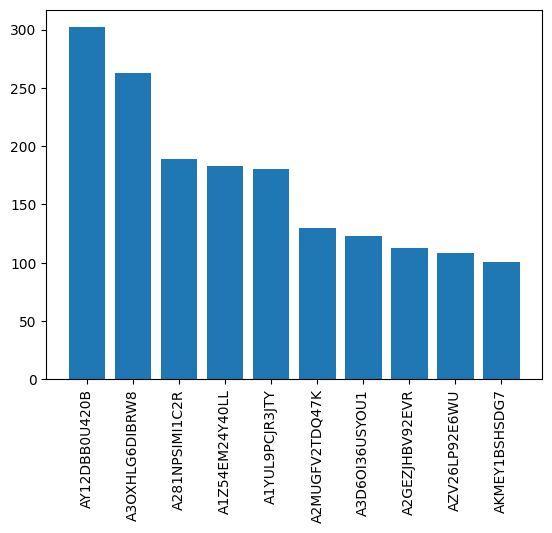

In [124]:
plt.bar(recommend_df.index[0:10],recommend_df['no_of_purchase'][0:10].values)
plt.xticks(rotation='vertical')

In [125]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [176]:
len(data['ProductId'].unique())

63935

In [199]:
prod_count = data['ProductId'].value_counts().to_frame()

In [203]:
prod_count=data['ProductId'].value_counts()>500

In [216]:
prod_count

ProductId
B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B000NMJWZO     True
B000UBD88A    False
              ...  
B003VY9XD2    False
B00250U7II    False
B0040ED766    False
B000JQJQV4    False
B001LR2CU2    False
Name: count, Length: 63935, dtype: bool

In [218]:
prod_count.head(4).index

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B000NMJWZO'], dtype='object', name='ProductId')

In [219]:
freq_prod_id =prod_count.head(4).index

In [220]:
freq_prod_id

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B000NMJWZO'], dtype='object', name='ProductId')

In [221]:
data['ProductId'].isin(freq_prod_id)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 316203, dtype: bool

In [222]:
freq_prod_df = data[data['ProductId'].isin(freq_prod_id)]

In [223]:
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [224]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Axes: xlabel='ProductId', ylabel='count'>

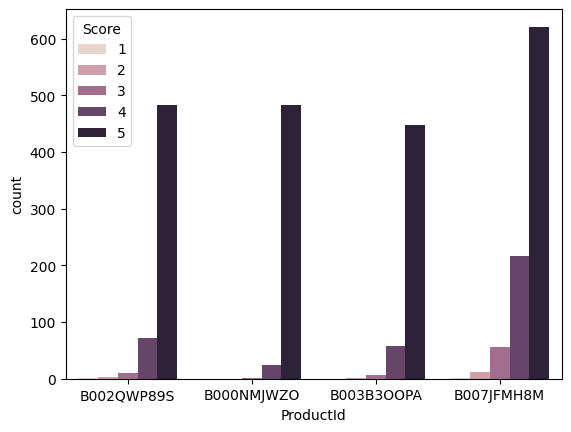

In [233]:
sns.countplot(x ='ProductId',data=freq_prod_df, hue='Score')

In [230]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [232]:
data['UserId'].value_counts()

UserId
AY12DBB0U420B     302
A3OXHLG6DIBRW8    263
A281NPSIMI1C2R    189
A1Z54EM24Y40LL    183
A1YUL9PCJR3JTY    180
                 ... 
ABPRZQDARZWUM       1
A1BM1BXOAIC2OD      1
A2LJ1ERVF21NO       1
A19T6VQONB7M0V      1
A3LGQPJCZVL9UC      1
Name: count, Length: 213876, dtype: int64